<a href="https://colab.research.google.com/github/Rachel1809/Linear-regression-from-scratch/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression from scratch

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Loss

$$\mathcal{L} = \frac{\displaystyle \sum_{i=0}^{N}(\hat y_i - y_i)^2}{N}$$

$$\nabla\mathcal{L} = \frac{2 \times (\hat y_i - y_i)}{N}$$

In [66]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_true = y_true
        self.y_pred = y_pred
        return ((self.y_pred - self.y_true)**2).mean()

    def gradient(self):
        return 2. * (self.y_pred - self.y_true) / self.y_true.shape[0]

## Linear regression

In [98]:
class Linear:
    def __init__(self, input_dim, output_dim = 1):
        # weights: n x 1
        # bias: 1 x 1
        self.weights = np.random.rand(input_dim, output_dim) - 0.5
        self.bias = np.random.rand((1)) - 0.5
    def __call__(self, x):
        # x: m x n
        self.x = x
        return self.x @ self.weights + self.bias

    def gradient(self, loss_grad):
        # y = w * x + b
        # d/dw = x * grad_loss
        # d/dx = w * grad_loss
        # d/db = sum(grad_loss)
        # grad_weights: n x 1
        # grad_x: m x n
        # grad_bias = 1 x 1
        # loss_grad: m x 1
        self.grad_weights = self.x.T @ loss_grad
        self.grad_bias = loss_grad.sum()
        self.grad_x = loss_grad @ self.weights.T
        return self.grad_x
    
    def update(self, lr=0.01):
        # weight = weights - learning rate * weight_gradient
        # bias = bias - learning rate * bias_gradient
        self.weights = self.weights - lr * self.grad_weights
        self.bias = self.bias - lr * self.grad_bias
        return {'weight_pred': self.weights, 'bias_pred': self.bias}

## Train model

In [99]:
class Model:
    def __init__(self, num_sample, num_feature):
        self.x = np.random.uniform(-1, 1, (num_sample, num_feature))
        array = []
        for i in range(num_feature):
            generate_weight = np.random.randint(-100, 100)
            array.append([generate_weight])
        self.weight_true = np.array(array)
        self.bias_true = np.array([np.random.randint(-100, 100)])
        self.y_true = self.x @ self.weight_true + self.bias_true
        self.linear = Linear(num_feature)
        self.loss = MSE()

    def __call__(self, lr, num_epochs):
        for i in range(num_epochs):
            self.y_pred = self.linear(self.x)
            loss_val = self.loss(self.y_pred, self.y_true)
            if (i%5 == 0):
                print(f'Epoch: {i}, Loss: {loss_val}')
            
            gradient_loss = self.loss.gradient()
            self.linear.gradient(gradient_loss)
            self.res = self.linear.update(lr)
        self.y_pred = self.linear(self.x)
        return {'x':self.x, 'y_true': self.y_true, 'y_pred': self.y_pred,
                'weight_true': self.weight_true, 'bias_true': self.bias_true,
                'weight_pred': self.res['weight_pred'], 'bias_pred': self.res['bias_pred']}

    def predict(self, x):
        return self.linear(x)

    def plot_2d(self):
        if (self.x.shape[1] >= 2):
            self.plot_3d()
        else:
            plt.plot(self.x, self.y_true, marker='x', label='actual function')
            plt.plot(self.x, self.y_pred, label='Model function')
    
    def plot_3d(self):
        if (self.x.shape[1] >= 2):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(self.x[:,0], self.x[:,1], self.y_true, marker='x', label='actual function')
            if self.y_pred is not None:
                ax.scatter(self.x[:, 0], self.x[:, 1], self.y_true, color='orange', label='predict function') 
            plt.legend()

        else:
            self.plot_2d()
        

Epoch: 0, Loss: 3305.0953995328646
Epoch: 5, Loss: 1467.014946940219
Epoch: 10, Loss: 756.4976203292259
Epoch: 15, Loss: 403.6413766249246
Epoch: 20, Loss: 216.8788933045117
Epoch: 25, Loss: 116.69937353599535
Epoch: 30, Loss: 62.81633191221425
Epoch: 35, Loss: 33.816975015864756
Epoch: 40, Loss: 18.206885151790516
Epoch: 45, Loss: 9.803262896797811
Epoch: 50, Loss: 5.278834728598016
Epoch: 55, Loss: 2.8427378585043273
Epoch: 60, Loss: 1.530967398387563
Epoch: 65, Loss: 0.8245643364443169
Epoch: 70, Loss: 0.44413167508391543
Epoch: 75, Loss: 0.2392360864271918
Epoch: 80, Loss: 0.12887495851832745
Epoch: 85, Loss: 0.06942829240844231
Epoch: 90, Loss: 0.03740500658873116
Epoch: 95, Loss: 0.020153362871303617
Weight true: [[-38]
 [-86]], Bias true: [-20]
 Weight predict: [[-37.90607033]
 [-85.83487288]], Bias predict: [-20.01158993]


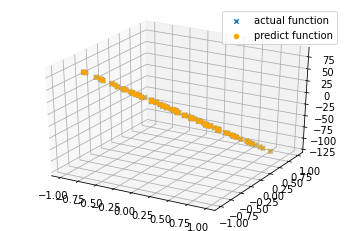

In [105]:
n = 100
d = 2
lr = 0.1
epochs = 100
linear_regression = Model(n, d)
result = linear_regression(lr, epochs)
print(f"Weight true: {result['weight_true']}, Bias true: {result['bias_true']}")
print(f" Weight predict: {result['weight_pred']}, Bias predict: {result['bias_pred']}")
linear_regression.plot_2d()